        KNN - gender classification

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [13]:
df = pd.read_csv('school_data_train.csv')
print( len(df) )
print( df.head() )

980
   UserID Gender  Ageyears Handed  Height  Foot_Length  Arm_Span  \
0       1      F        13      R     174           26       173   
1       2      F         9      R     139           21       139   
2       3      M        12      R     164           30       157   
3       4      M        11      R     146           26       145   
4       5      F        10      R     159           22       150   

   Languages_spoken Travel_to_School  Travel_time_to_School  Reaction_time  \
0                 2              Car                     15          0.350   
1                 6             Walk                      5          0.549   
2                 2              Car                     10          0.400   
3                 3              Car                      1          0.370   
4                 1              Bus                      6          0.296   

   Score_in_memory_game  
0                    27  
1                     0  
2                    33  
3             

In [14]:
# replace zeros with mean
zero_not_accepted = [ 'Reaction_time','Score_in_memory_game']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [4]:
print(df['Reaction_time'])
print(df['Score_in_memory_game'])

0      0.350
1      0.549
2      0.400
3      0.370
4      0.296
       ...  
975    0.390
976    0.000
977    0.230
978    0.490
979    0.000
Name: Reaction_time, Length: 980, dtype: float64
0      27.0
1      45.0
2      33.0
3      28.0
4      33.0
       ... 
975    41.0
976    45.0
977    70.0
978    67.0
979    34.0
Name: Score_in_memory_game, Length: 980, dtype: float64


In [15]:
# replace gender with M = 1 and F = 0
dummy = pd.get_dummies(df['Gender'])
df2 = pd.concat((df, dummy), axis = 1)
df2 = df2.drop(['Gender'], axis=1)
df2 = df2.drop(['F'], axis=1)
df2 = df2.rename(columns = {"M":"Sex"})
df2.head()

,UserID,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game,Sex
0,1,13,R,174,26,173,2,Car,15,0.350,27.0,0
1,2,9,R,139,21,139,6,Walk,5,0.549,45.0,0
2,3,12,R,164,30,157,2,Car,10,0.400,33.0,1
3,4,11,R,146,26,145,3,Car,1,0.370,28.0,1
4,5,10,R,159,22,150,1,Bus,6,0.296,33.0,0


In [16]:
# replace Handed with Right = 0 and Left = 2 and Both = 1
df2['Hand'] = pd.factorize(df2.Handed)[0]
print(df2.Handed.value_counts())
print(df2.head(7))
print(df2.tail())

R    848
L     82
B     50
Name: Handed, dtype: int64
   UserID  Ageyears Handed  Height  Foot_Length  Arm_Span  Languages_spoken  \
0       1        13      R     174           26       173                 2   
1       2         9      R     139           21       139                 6   
2       3        12      R     164           30       157                 2   
3       4        11      R     146           26       145                 3   
4       5        10      R     159           22       150                 1   
5       6        11      R     151           24       151                 1   
6       7        12      B     160           24       160                 2   

  Travel_to_School  Travel_time_to_School  Reaction_time  \
0              Car                     15          0.350   
1             Walk                      5          0.549   
2              Car                     10          0.400   
3              Car                      1          0.370   
4            

In [17]:
df2.head(10)

,UserID,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game,Sex,Hand
0,1,13,R,174,26,173,2,Car,15,0.350,27.0,0,0
1,2,9,R,139,21,139,6,Walk,5,0.549,45.0,0,0
2,3,12,R,164,30,157,2,Car,10,0.400,33.0,1,0
3,4,11,R,146,26,145,3,Car,1,0.370,28.0,1,0
4,5,10,R,159,22,150,1,Bus,6,0.296,33.0,0,0
5,6,11,R,151,24,151,1,Bus,5,0.551,34.0,0,0
6,7,12,B,160,24,160,2,Bus,35,0.469,41.0,0,1
7,8,15,R,171,26,169,1,Bus,20,0.116,44.0,1,0
8,9,14,R,169,27,159,2,Walk,6,0.369,39.0,1,0
9,10,10,R,147,23,146,1,Cycle,10,0.410,82.0,1,0


In [18]:
# Replacing the transportation Categorical values into Numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Transport'] = le.fit_transform(df2.Travel_to_School)
df2.head()

,UserID,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game,Sex,Hand,Transport
0,1,13,R,174,26,173,2,Car,15,0.350,27.0,0,0,3
1,2,9,R,139,21,139,6,Walk,5,0.549,45.0,0,0,9
2,3,12,R,164,30,157,2,Car,10,0.400,33.0,1,0,3
3,4,11,R,146,26,145,3,Car,1,0.370,28.0,1,0,3
4,5,10,R,159,22,150,1,Bus,6,0.296,33.0,0,0,2


In [19]:
df2.Travel_to_School.value_counts()

Car                            418
Bus                            288
Walk                           214
Cycle                           25
Rail                            21
Other                            7
Board                            4
SkateBoard...                    1
Boat                             1
SkateBoarding/Rollerblading      1
Name: Travel_to_School, dtype: int64

In [20]:
titles = list(df2.columns)
titles

['UserID',
 'Ageyears',
 'Handed',
 'Height',
 'Foot_Length',
 'Arm_Span',
 'Languages_spoken',
 'Travel_to_School',
 'Travel_time_to_School',
 'Reaction_time',
 'Score_in_memory_game',
 'Sex',
 'Hand',
 'Transport']

In [21]:
df2 = df2.drop(['Travel_to_School'], axis=1)
df2 = df2.drop(['Handed'], axis=1)
df2.head()

,UserID,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game,Sex,Hand,Transport
0,1,13,174,26,173,2,15,0.350,27.0,0,0,3
1,2,9,139,21,139,6,5,0.549,45.0,0,0,9
2,3,12,164,30,157,2,10,0.400,33.0,1,0,3
3,4,11,146,26,145,3,1,0.370,28.0,1,0,3
4,5,10,159,22,150,1,6,0.296,33.0,0,0,2


In [27]:
titles = list(df2.columns)
titles

['UserID',
 'Ageyears',
 'Height',
 'Foot_Length',
 'Arm_Span',
 'Languages_spoken',
 'Travel_time_to_School',
 'Reaction_time',
 'Score_in_memory_game',
 'Sex',
 'Hand',
 'Transport']

In [28]:
titles[9],titles[11] = titles[11],titles[9] 
titles

['UserID',
 'Ageyears',
 'Height',
 'Foot_Length',
 'Arm_Span',
 'Languages_spoken',
 'Travel_time_to_School',
 'Reaction_time',
 'Score_in_memory_game',
 'Transport',
 'Hand',
 'Sex']

In [29]:
df2 = df2[titles]
df2

,UserID,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game,Transport,Hand,Sex
0,1,13,174,26,173,2,15,0.350,27.0,3,0,0
1,2,9,139,21,139,6,5,0.549,45.0,9,0,0
2,3,12,164,30,157,2,10,0.400,33.0,3,0,1
3,4,11,146,26,145,3,1,0.370,28.0,3,0,1
4,5,10,159,22,150,1,6,0.296,33.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,976,14,155,22,94,1,15,0.390,41.0,3,0,0
976,977,9,141,23,145,1,5,0.000,45.0,3,0,0
977,978,13,156,26,156,1,10,0.230,70.0,9,2,1
978,979,11,157,24,152,2,15,0.490,67.0,4,0,1


In [31]:
# droping User ID for feature selection
df2.drop('UserID', axis=1, inplace = True) ## set axis = 0 to remove rows, axis = 1 to remove colums
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game,Transport,Hand,Sex
0,13,174,26,173,2,15,0.350,27.0,3,0,0
1,9,139,21,139,6,5,0.549,45.0,9,0,0
2,12,164,30,157,2,10,0.400,33.0,3,0,1
3,11,146,26,145,3,1,0.370,28.0,3,0,1
4,10,159,22,150,1,6,0.296,33.0,2,0,0


In [32]:
# split dataset
X = df2.iloc[:, 0:10]
y = df2.iloc[:, 10]
print(X)
print(y)

     Ageyears  Height  Foot_Length  Arm_Span  Languages_spoken  \
0          13     174           26       173                 2   
1           9     139           21       139                 6   
2          12     164           30       157                 2   
3          11     146           26       145                 3   
4          10     159           22       150                 1   
..        ...     ...          ...       ...               ...   
975        14     155           22        94                 1   
976         9     141           23       145                 1   
977        13     156           26       156                 1   
978        11     157           24       152                 2   
979        12     151           29       159                 2   

     Travel_time_to_School  Reaction_time  Score_in_memory_game  Transport  \
0                       15          0.350                  27.0          3   
1                        5          0.549          

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size=0.2)

In [34]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [35]:
len(y)

980

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(784, 10) (196, 10) (784,) (196,)


In [37]:
import math
math.sqrt(len(y_test))

14.0

In [38]:
# define the model: Init K-NN
knn = KNeighborsClassifier(n_neighbors=15, p=2, metric = 'euclidean')

In [39]:
# Fit Model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [40]:
# Predict the test set results
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

In [41]:
# Accuracy score
print(accuracy_score(y_test, y_pred))

0.6632653061224489


In [42]:
# evaluate model
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[91 21]
 [45 39]]
0.5416666666666667


In [53]:
# Cross Validation
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 15)
cvScore = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
print(cvScore)

[0.59693878 0.6122449  0.66326531 0.66836735 0.61734694]


In [54]:
# mean of 10 fold CV Score
print(cvScore.mean())

0.6316326530612245


In [55]:
# Accuracy for the range of K-values from 1 - 50
k_range = range(1, 50)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring= 'accuracy')
    k_scores.append(scores.mean())

In [56]:
k_scores

[0.5846938775510204,
 0.5795918367346939,
 0.5785714285714285,
 0.6173469387755102,
 0.5938775510204082,
 0.6020408163265306,
 0.6204081632653061,
 0.6244897959183673,
 0.6244897959183674,
 0.6326530612244897,
 0.6112244897959184,
 0.6173469387755102,
 0.6173469387755102,
 0.6193877551020408,
 0.6204081632653061,
 0.6357142857142857,
 0.6285714285714286,
 0.6346938775510204,
 0.6244897959183673,
 0.6316326530612244,
 0.6244897959183674,
 0.6265306122448979,
 0.6295918367346939,
 0.6377551020408163,
 0.6265306122448979,
 0.6295918367346939,
 0.6295918367346938,
 0.6377551020408163,
 0.633673469387755,
 0.642857142857143,
 0.6428571428571429,
 0.6459183673469389,
 0.6387755102040817,
 0.6479591836734694,
 0.6408163265306122,
 0.6408163265306122,
 0.6428571428571429,
 0.6408163265306122,
 0.6387755102040815,
 0.6408163265306122,
 0.6357142857142858,
 0.6377551020408163,
 0.6377551020408164,
 0.6408163265306122,
 0.6397959183673468,
 0.6397959183673468,
 0.639795918367347,
 0.6428571428571

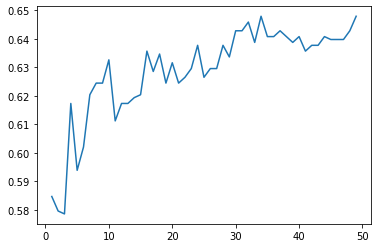

In [57]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.lineplot(x = k_range, y = k_scores);

Data visualization for Male and Female

In [58]:
data = pd.read_csv('school_data_train.csv')

In [59]:
data

,UserID,Gender,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game
0,1,F,13,R,174,26,173,2,Car,15,0.350,27
1,2,F,9,R,139,21,139,6,Walk,5,0.549,0
2,3,M,12,R,164,30,157,2,Car,10,0.400,33
3,4,M,11,R,146,26,145,3,Car,1,0.370,28
4,5,F,10,R,159,22,150,1,Bus,6,0.296,33
...,...,...,...,...,...,...,...,...,...,...,...,...
975,976,F,14,R,155,22,94,1,Car,15,0.390,41
976,977,F,9,R,141,23,145,1,Car,5,0.000,45
977,978,M,13,L,156,26,156,1,Walk,10,0.230,70
978,979,M,11,R,157,24,152,2,Cycle,15,0.490,67


In [85]:
# compare the height for Male and Female
male = data[data.Gender == 'M']
male

,UserID,Gender,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game
2,3,M,12,R,164,30,157,2,Car,10,0.400,33
3,4,M,11,R,146,26,145,3,Car,1,0.370,28
7,8,M,15,R,171,26,169,1,Bus,20,0.116,44
8,9,M,14,R,169,27,159,2,Walk,6,0.369,39
9,10,M,10,R,147,23,146,1,Cycle,10,0.410,82
...,...,...,...,...,...,...,...,...,...,...,...,...
973,974,M,18,R,183,30,183,2,Bus,20,0.265,53
974,975,M,14,R,168,27,168,1,Walk,10,0.573,41
977,978,M,13,L,156,26,156,1,Walk,10,0.230,70
978,979,M,11,R,157,24,152,2,Cycle,15,0.490,67


In [86]:
male.describe()

,UserID,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,499.128505,13.259346,162.264019,25.065421,160.633178,1.537383,16.464953,0.397297,41.179907
std,284.626309,2.489421,16.236770,3.703334,18.583781,0.916160,14.219958,0.222084,23.836835
min,3.000000,6.000000,100.000000,11.000000,90.000000,1.000000,1.000000,0.000000,0.000000
25%,255.500000,12.000000,150.000000,23.000000,149.000000,1.000000,5.000000,0.310000,31.000000
50%,503.500000,13.000000,162.000000,25.000000,160.000000,1.000000,13.000000,0.370000,41.000000
75%,739.500000,15.000000,174.000000,27.000000,175.000000,2.000000,20.000000,0.453250,53.250000
max,980.000000,20.000000,226.000000,45.000000,218.000000,9.000000,95.000000,1.820000,213.000000


In [87]:
female = data[data.Gender == 'F']
female

,UserID,Gender,Ageyears,Handed,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_to_School,Travel_time_to_School,Reaction_time,Score_in_memory_game
0,1,F,13,R,174,26,173,2,Car,15,0.350,27
1,2,F,9,R,139,21,139,6,Walk,5,0.549,0
4,5,F,10,R,159,22,150,1,Bus,6,0.296,33
5,6,F,11,R,151,24,151,1,Bus,5,0.551,34
6,7,F,12,B,160,24,160,2,Bus,35,0.469,41
...,...,...,...,...,...,...,...,...,...,...,...,...
967,968,F,17,R,161,23,164,1,Car,10,0.729,46
968,969,F,14,R,165,23,149,2,Bus,15,0.702,0
972,973,F,13,R,158,26,156,2,Bus,30,0.510,35
975,976,F,14,R,155,22,94,1,Car,15,0.390,41


In [88]:
female.describe()

,UserID,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,483.809783,13.259058,157.740942,23.181159,154.438406,1.617754,16.210145,0.444575,37.125000
std,281.890916,2.316968,12.720787,3.096126,16.562695,0.937566,13.690222,0.238876,19.398878
min,1.000000,5.000000,90.000000,9.000000,88.000000,1.000000,0.000000,0.000000,0.000000
25%,238.750000,12.000000,151.000000,22.000000,147.000000,1.000000,5.000000,0.340000,31.000000
50%,474.000000,13.000000,160.000000,23.000000,157.000000,1.000000,13.000000,0.400000,39.000000
75%,722.500000,15.000000,166.000000,25.000000,165.000000,2.000000,20.000000,0.510000,48.000000
max,977.000000,18.000000,184.000000,45.000000,213.000000,8.000000,127.000000,1.920000,139.000000


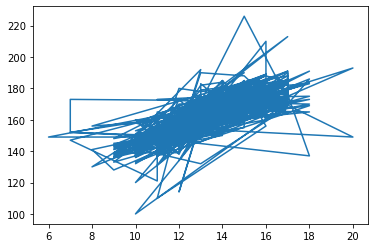

In [89]:
plt.plot(male.Ageyears, male.Height)
plt.show()

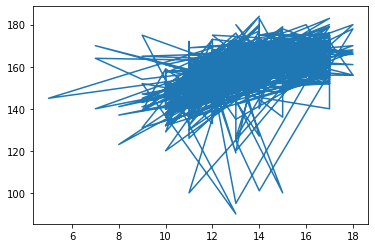

In [90]:
plt.plot(female.Ageyears, female.Height)
plt.show()

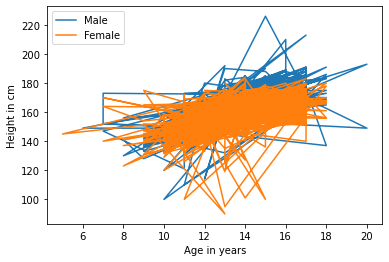

In [91]:
plt.plot(male.Ageyears, male.Height)
plt.plot(female.Ageyears, female.Height)
plt.legend(['Male','Female'])
plt.xlabel('Age in years')
plt.ylabel('Height in cm')
plt.show()

# Cross validation

In [92]:
from sklearn.model_selection import cross_val_predict
knn = KNeighborsClassifier(n_neighbors=15)
y_pred = cross_val_predict(knn, X, y, cv = 5)

In [93]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,

Evaluation

Mean Squared Error: Averaged od squared error B/w Actual and predicted values (lower = better)

R2: correlation b/w dependent and independent variables (higher = better)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

0.3683673469387755
-0.4974434511716104


# Optimal value of K for lowest error

In [95]:
error = []
for k in range (1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv = 5)
    error.append(mean_squared_error(y,y_pred))

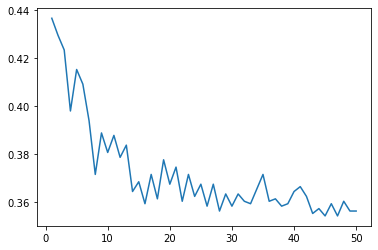

In [96]:
plt.plot(range(1,51), error)

Optimal Value of K = 17, because from 17 the error rate starts to fluctuate between 0.36 to 0.38  and  I am choosing 17 inorder to stay away from overfitting the model.

# Feature Selection

filter features by variation

In [97]:
df2.var()

Ageyears                   5.724379
Height                   211.098201
Foot_Length               12.251260
Arm_Span                 314.474682
Languages_spoken           0.862416
Travel_time_to_School    193.695352
Reaction_time              0.054178
Score_in_memory_game     215.469821
Transport                  7.248182
Hand                       0.338375
Sex                        0.246249
dtype: float64

# Filter Features by /correlation

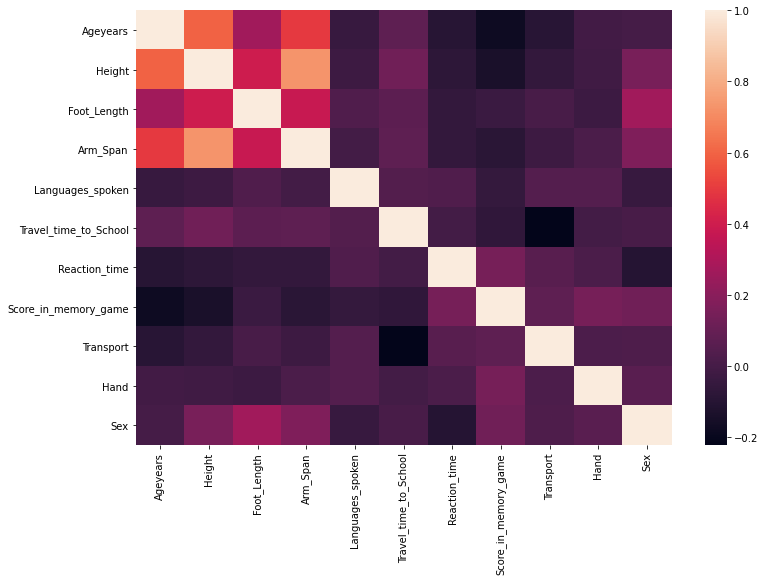

In [98]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df2.corr(), ax=ax)
plt.show()

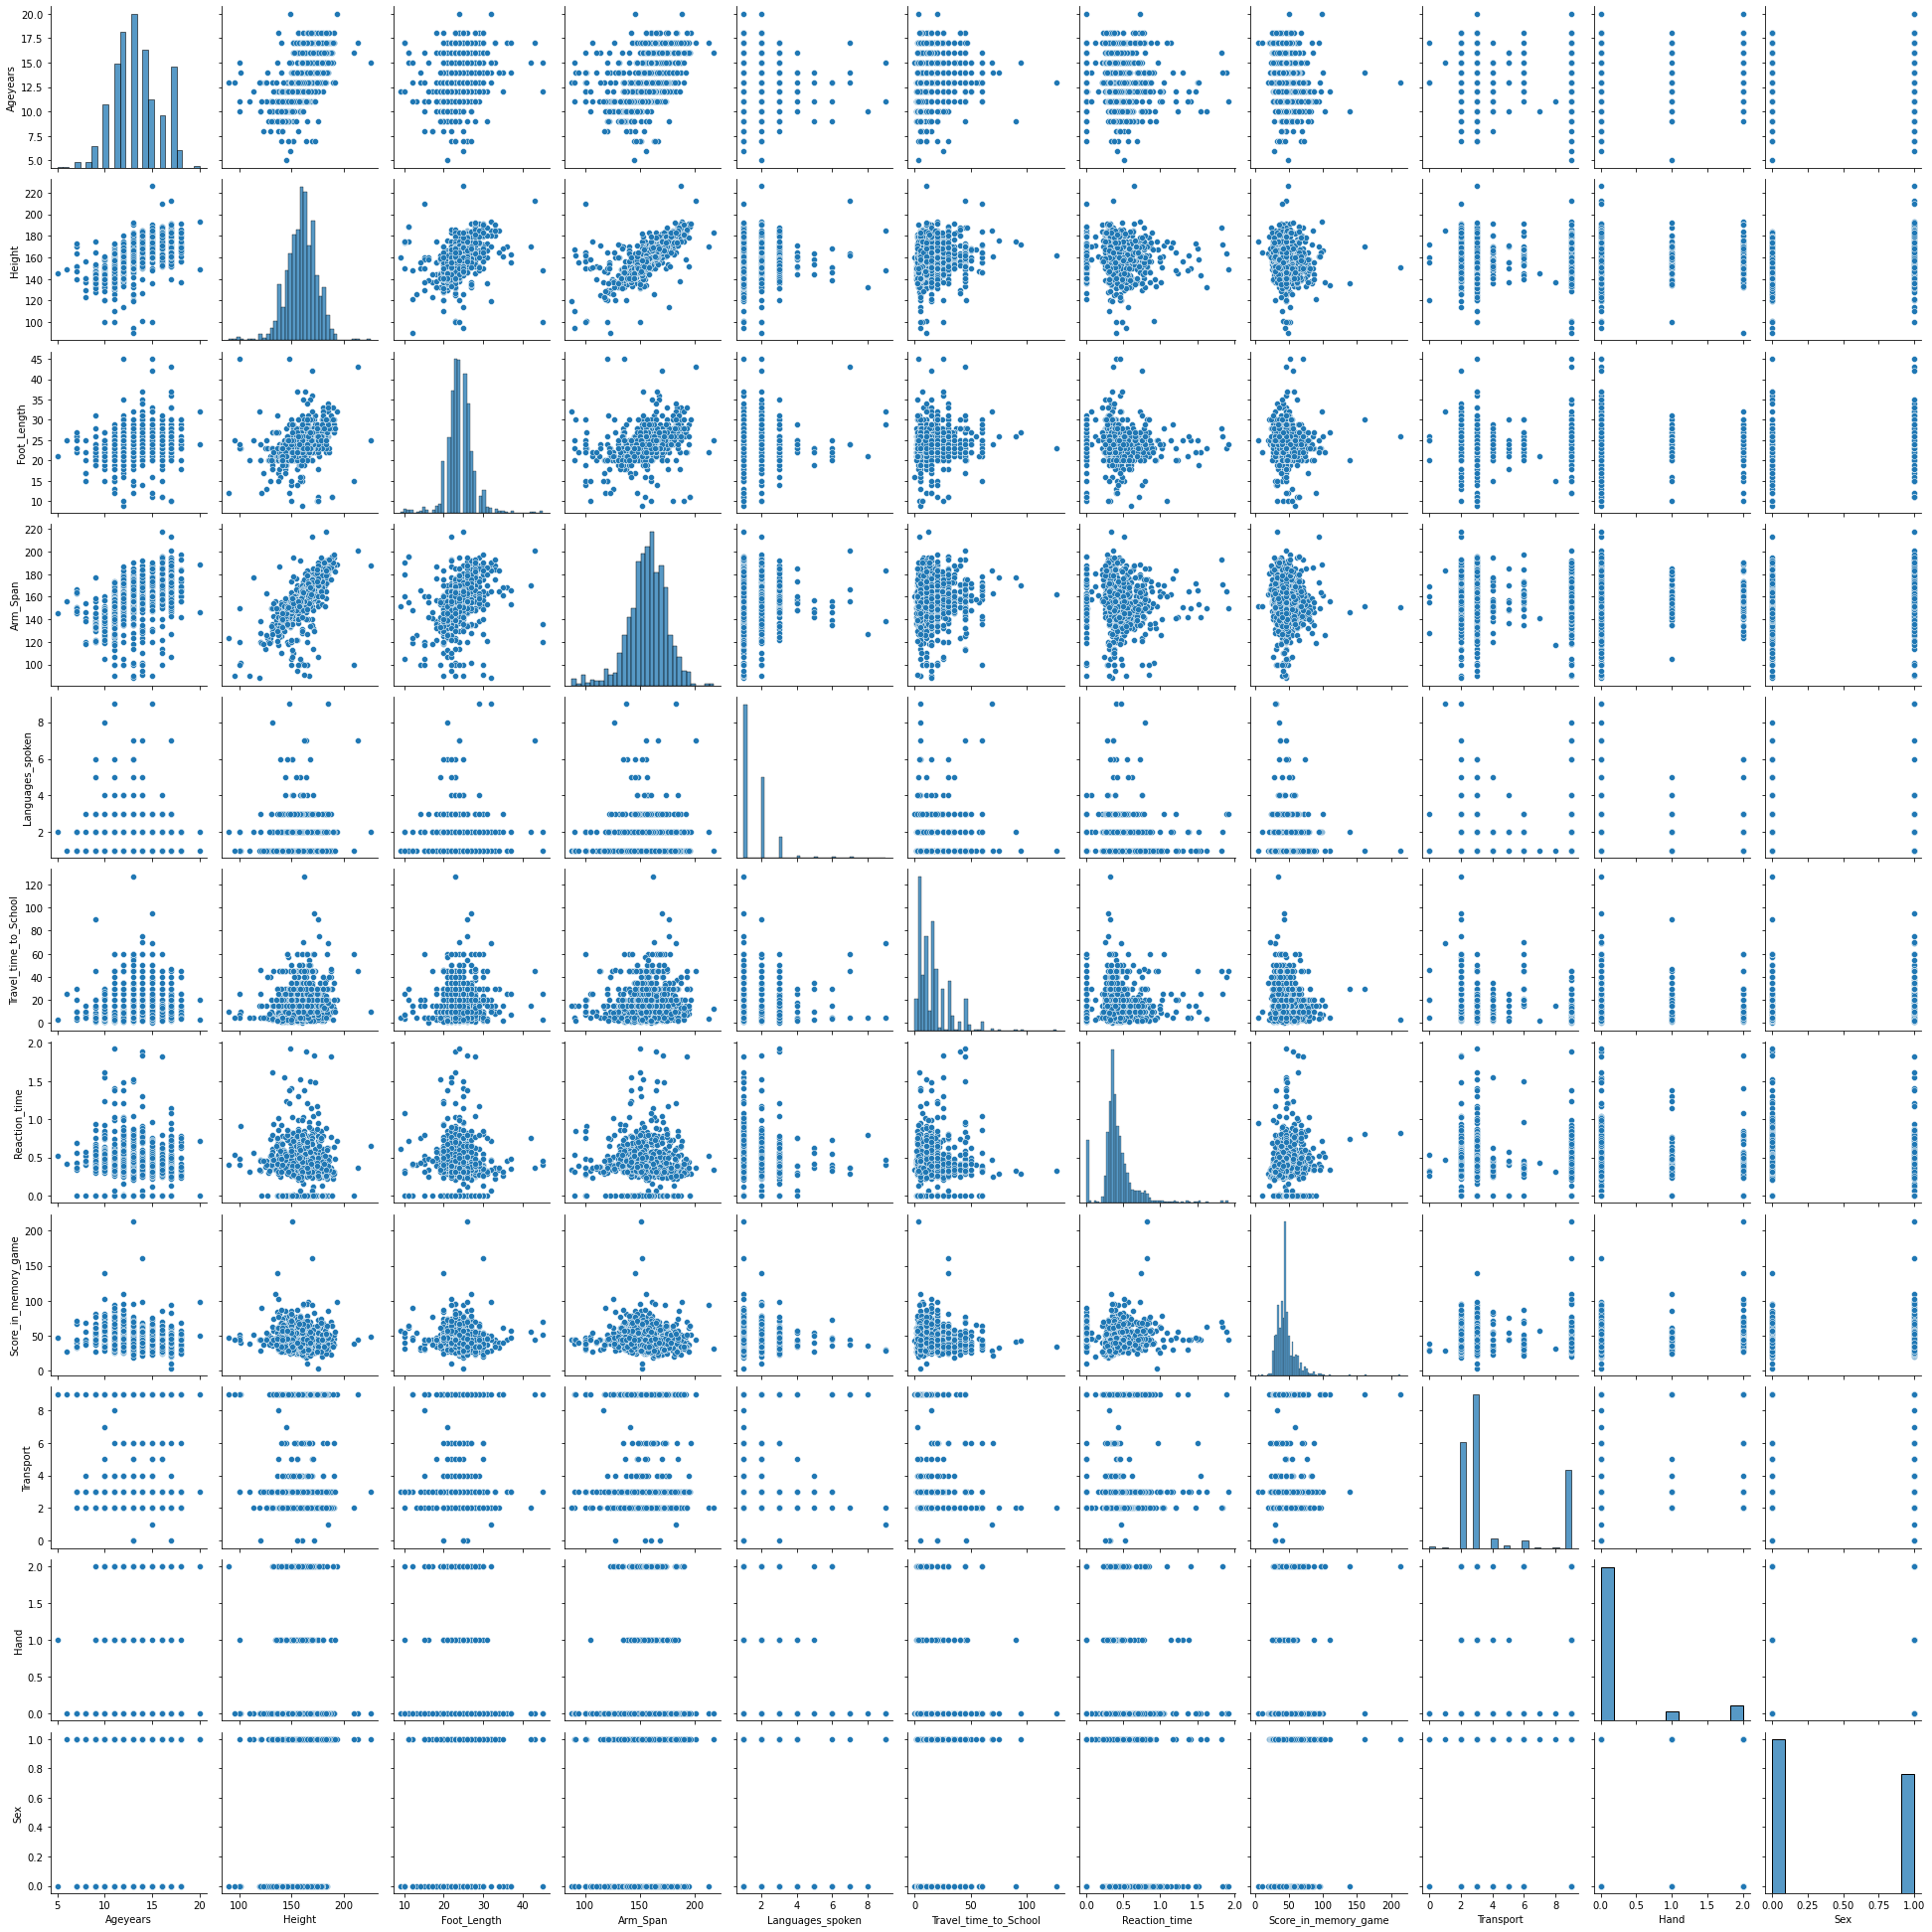

In [99]:
sn.pairplot(df2)

In [100]:
# Age, height, foot length, Arm span, Travel time to school, Score in memory game, Transport are selected as the input features Based on the variation, correlation, relationship between the features.
#X = df2.loc[:, ["Ageyears", "Height","Foot_Length","Arm_Span","Travel_time_to_School","Score_in_memory_game","Transport"]].values
#y = df2.loc[:, "Sex"].values

In [102]:
df2['Sex'].value_counts()

0    552
1    428
Name: Sex, dtype: int64

# we have 552 girls and 428 boys 

In [104]:
df2.groupby('Sex').mean()

,Ageyears,Height,Foot_Length,Arm_Span,Languages_spoken,Travel_time_to_School,Reaction_time,Score_in_memory_game,Transport,Hand
Sex,,,,,,,,,,
0,13.259058,157.740942,23.181159,154.438406,1.617754,16.210145,0.444575,43.565217,4.048913,0.186594
1,13.259346,162.264019,25.065421,160.633178,1.537383,16.464953,0.397297,47.383178,4.200935,0.259346


mean values of boys and girls are given above. with girls as 0 and boys as 1

In [173]:
# define the model: Init K-NN
knn = KNeighborsClassifier(n_neighbors=15, p=2, metric = 'euclidean')

In [174]:
# Fit Model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [175]:
# accuracy score on training data
knn_x_train_prediction =  knn.predict(X_train)
knn_training_data_accuracy = accuracy_score(knn_x_train_prediction, y_train)

In [176]:
print('Accuracy score on knn traininig data: ',knn_training_data_accuracy)

Accuracy score on knn traininig data:  0.7091836734693877


In [177]:
# accuracy score on test data
knn_x_test_prediction =  knn.predict(X_test)
knn_testing_data_accuracy = accuracy_score(knn_x_test_prediction, y_test)

In [178]:
print('Accuracy score on knn testing data: ',knn_testing_data_accuracy)

Accuracy score on knn testing data:  0.6632653061224489


train test split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [180]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(980, 10) (784, 10) (196, 10) (980,) (784,) (196,)


Training the model with SVM classifier

In [182]:
from sklearn import svm
svm = svm.SVC(kernel='linear')

# fitting the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [184]:
# accuracy score on training data for svm
svm_x_train_prediction =  svm.predict(X_train)
svm_training_data_accuracy = accuracy_score(svm_x_train_prediction, y_train)
print('Accuracy score on svm traininig data: ',svm_training_data_accuracy)

Accuracy score on svm traininig data:  0.6862244897959183


In [185]:
# accuracy score on testing data for svm
svm_x_testing_prediction =  svm.predict(X_test)
svm_testing_data_accuracy = accuracy_score(svm_x_testing_prediction, y_test)
print('Accuracy score on svm testing data: ',svm_testing_data_accuracy)

Accuracy score on svm testing data:  0.6785714285714286


# Making a Predictive Model for KNN

In [186]:
input_data = (13,160,25,160,1,35,0.312,42,0,1)

# change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc_X.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Female')
else:
    print('Male')

[[-0.11779155  0.02076463  0.28464207  0.15880133 -0.60921059  1.38328523
  -0.49531353 -0.2222284  -1.53575725  1.35035097]]
[0]
Female


# Making a Predictive Model for SVM

In [187]:
input_data = (13,160,25,160,1,35,0.312,42,0,1)

# change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc_X.transform(input_data_reshaped)
print(std_data)

prediction = svm.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Female')
else:
    print('Male')

[[-0.11779155  0.02076463  0.28464207  0.15880133 -0.60921059  1.38328523
  -0.49531353 -0.2222284  -1.53575725  1.35035097]]
[0]
Female


# Making real time prediction with KNN

In [191]:
input_data = ([[11,154,20,145,1,5,0.8,45,4,0],
              [10,161,21,155,1,5,0.406,0,1,1],
              [6,115,18,117,4,10,0.69,77,4,1],
              [8,138,20,137,1,5,0.312,0,1,1],
              [17,160,21,160,1,7,0.774,35,1,1],
              [11,154,23,154,1,10,0.69,40,1,0],
              [11,157,27,158,2,50,0.33,34,3,1],
              [15,173,28,178,2,5,0.391,41,1,1],
              [13,162,23,158,2,32,0.29,41,0,1],
              [16,165,23,151,1,10,0.40,39,1,1],
              [14,150,20,140,1,45,0.396,50,1,1],
              [12,166,28,145,1,10,0.29,45,4,1],
              [7,147,23,147,2,10,0.4,44,1,1],
              [14,175,30,170,1,10,0.32,43,1,0],
              [11,147,28,126,1,12,0.359,39,4,1],
              [11,148,22,145,4,5,0.37,41,1,1],
              [11,149,23,140,1,2,0.45,39,1,2],
              [15,179,29,181,1,10,0.248,38,2,1],
              [13,160,25,160,1,35,0.312,42,0,1],
              [11,150,27,155,1,15,0.46,57,1,0]])

# standardize the input data
std_data = sc_X.transform(input_data)


knn_prediction = knn.predict(std_data)
print(knn_prediction)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1]


# submission of prediction for test data

In [193]:
knn_submission = pd.DataFrame()
knn_submission['UserID'] = ([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],
              [11],[12],[13],[14],[15],[16],[17],[18],[19],[20]])
knn_submission['Gender'] = knn_prediction
knn_submission.head()

,UserID,Gender
0,[1],0
1,[2],0
2,[3],0
3,[4],0
4,[5],0


In [195]:
knn_submission.to_csv('knn_sex_classification.csv', index = False)

# Making real time prediction with SVM

In [197]:
input_data = ([[11,154,20,145,1,5,0.8,45,4,0],
              [10,161,21,155,1,5,0.406,0,1,1],
              [6,115,18,117,4,10,0.69,77,4,1],
              [8,138,20,137,1,5,0.312,0,1,1],
              [17,160,21,160,1,7,0.774,35,1,1],
              [11,154,23,154,1,10,0.69,40,1,0],
              [11,157,27,158,2,50,0.33,34,3,1],
              [15,173,28,178,2,5,0.391,41,1,1],
              [13,162,23,158,2,32,0.29,41,0,1],
              [16,165,23,151,1,10,0.40,39,1,1],
              [14,150,20,140,1,45,0.396,50,1,1],
              [12,166,28,145,1,10,0.29,45,4,1],
              [7,147,23,147,2,10,0.4,44,1,1],
              [14,175,30,170,1,10,0.32,43,1,0],
              [11,147,28,126,1,12,0.359,39,4,1],
              [11,148,22,145,4,5,0.37,41,1,1],
              [11,149,23,140,1,2,0.45,39,1,2],
              [15,179,29,181,1,10,0.248,38,2,1],
              [13,160,25,160,1,35,0.312,42,0,1],
              [11,150,27,155,1,15,0.46,57,1,0]])

# standardize the input data
std_data = sc_X.transform(input_data)


svm_prediction = svm.predict(std_data)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# submission of prediction for test data for SVM


In [198]:
svm_submission = pd.DataFrame()
svm_submission['UserID'] = ([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],
              [11],[12],[13],[14],[15],[16],[17],[18],[19],[20]])
svm_submission['Gender'] = svm_prediction
svm_submission.head()

,UserID,Gender
0,[1],0
1,[2],0
2,[3],0
3,[4],0
4,[5],0


In [199]:
svm_submission.to_csv('SVM_sex_classification.csv', index = False)